In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv")

In [36]:
#This code block is to define variables that I will use in the future.

#You can extract keys from dataframe, which you can use to extract features or labels.
print(df1.keys())
df1_x1 = df1['x1']
df1_x2 = df1['x2']
df1_y = df1['y']
df2_x1 = df2['x1']
df2_x2 = df2['x2']
df2_y = df2['y']


#To extract data as numpy array:
df1_numpy = df1.values
df2_numpy = df2.values


#You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df1['x1'].values
df1_x2_numpy = df1['x2'].values
df1_y_numpy = df1['y'].values
df2_x1_numpy = df2['x1'].values
df2_x2_numpy = df2['x2'].values
df2_y_numpy = df2['y'].values

#I only used the below variables


#The below rows are to find rows with 1 and 0 output separately, and to get these rows' features 
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
df1_class0 = df1[df1['y']==0]
df1_class1 = df1[df1['y']==1]
df2_class0 = df2[df2['y']==0]
df2_class1 = df2[df2['y']==1]
#extracting rows' x features
#dataset1 
dataset1_x1_zero = df1_class0['x1']
dataset1_x2_zero = df1_class0['x2']
dataset1_x1_one = df1_class1['x1']
dataset1_x2_one = df1_class1['x2']
#dataset 2
dataset2_x1_zero = df2_class0['x1']
dataset2_x2_zero = df2_class0['x2']
dataset2_x1_one = df2_class1['x1']
dataset2_x2_one = df2_class1['x2']
 

Index(['x1', 'x2', 'y'], dtype='object')


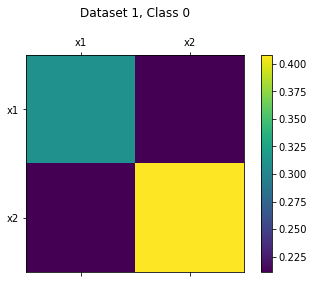

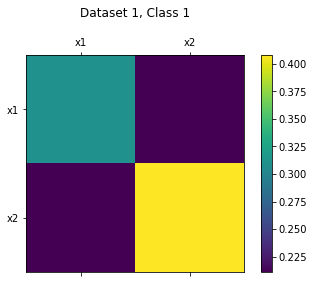

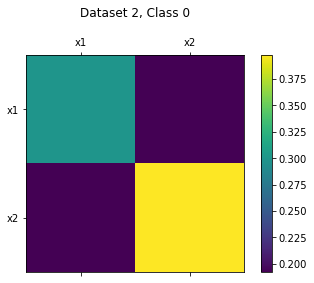

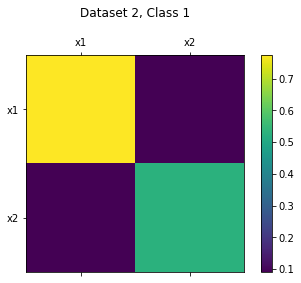

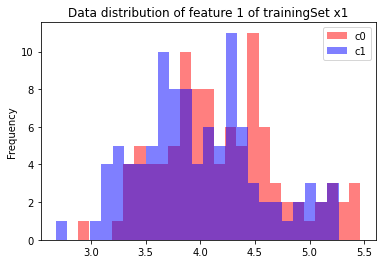

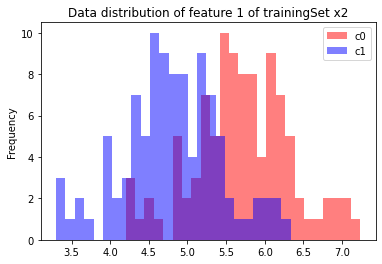

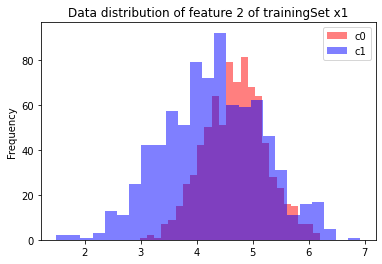

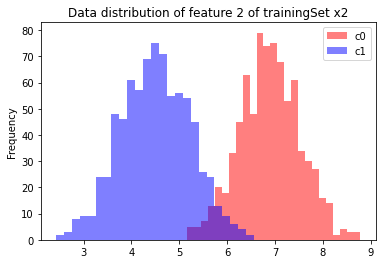

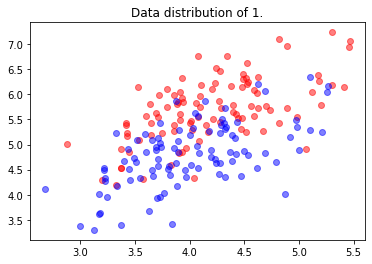

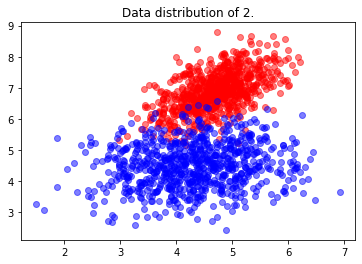

In [37]:
#PART A.2

def covmatrice(datasetnum,classnum,input1,input2):
    alpha = ['x1', 'x2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data = np.array([input1,input2]) # create an array
    cov_mtrx = np.cov(data) # show the array here
    cax = ax.matshow(cov_mtrx,interpolation='nearest') #cov. matrix of dataset1
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)
    plt.title('Dataset %s, Class %s\n'%(datasetnum,classnum))
    return cov_mtrx
    
cov_d_1_c_0 = covmatrice(1, 0, dataset1_x1_zero, dataset1_x2_zero)
cov_d_1_c_1 = covmatrice(1, 1, dataset1_x1_one, dataset1_x2_one)
cov_d_2_c_0 = covmatrice(2, 0, dataset2_x1_zero, dataset2_x2_zero)
cov_d_2_c_1 = covmatrice(2, 1, dataset2_x1_one, dataset2_x2_one)

#PART A.3

def histogram(datasetnum,featnum,input1, input2):
    fig = plt.figure() 
    #ax = fig.add_subplot(111)
    plt.hist(input1, bins=25, alpha=0.5, label = 'c0', color = 'red')
    plt.hist(input2, bins=25, alpha=0.5, label = 'c1', color = 'blue')
    plt.gca().set(title='Data distribution of feature {} of trainingSet {}'.format(datasetnum,featnum), ylabel='Frequency')
    plt.legend()
    
histogram(1,'x1',dataset1_x1_zero, dataset1_x1_one)
histogram(1,'x2',dataset1_x2_zero, dataset1_x2_one)
histogram(2,'x1',dataset2_x1_zero, dataset2_x1_one)
histogram(2,'x2',dataset2_x2_zero, dataset2_x2_one)


#PART A.4

def scatting(datasetnum,input1, input2, input3, input4):
    fig = plt.figure()
    plt.scatter(input1, input2, alpha = 0.5, color = 'red')
    plt.scatter(input3, input4, alpha = 0.5, color = 'blue')
    plt.gca().set(title='Data distribution of {}.'.format(datasetnum))


scatting(1,dataset1_x1_zero,dataset1_x2_zero, dataset1_x1_one, dataset1_x2_one)
scatting(2,dataset2_x1_zero,dataset2_x2_zero, dataset2_x1_one, dataset2_x2_one)

#A.2 Interpretation:
# Feature 1 is more dispersed than the second, 
# so the covariance matrix is lower, which is just the opposite for class 1 of the second dataset.
# Also, as can be seen, the covariance matrix of the two features gives a very low value, 
# which indicates that there is a big difference between their values.

#A.3 Interpretation:
# We can see that features of dataset 1 are in the same shape, this means their covariance matrix
# is equal to each other, but they are placed in different spots in the graph which means that their
# means are different.
# For the second dataset, features are shaped in different ways so their covariance matrices and means are different 
# from each other.


In [38]:
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

#PART B

def meanVector(dataset_input):
    a = np.mean(dataset_input.x1)
    b = np.mean(dataset_input.x2)
    c = [a,b] 
    return c

meanOfD1C0 = meanVector(df1_class0)
meanOfD1C1 = meanVector(df1_class1) 
meanOfD2C0 = meanVector(df2_class0)
meanOfD2C1 = meanVector(df2_class1) 

#FirstDatasetArray = [covmatrix 1, covmatrix 2, mean vector1, mean vector2]
FirstDatasetArray = [cov_d_1_c_0, cov_d_1_c_1, meanOfD1C0, meanOfD1C1, df1]
SecondDatasetArray = [cov_d_2_c_0, cov_d_2_c_1, meanOfD2C0, meanOfD2C1, df2]


print("Dataset 1, Class 0\n", "Mean: \n", meanOfD1C0, "\nCovariance Matrix: \n", cov_d_1_c_0)
print("\nDataset 1, Class 1\n", "Mean: \n", meanOfD1C1, "\nCovariance Matrix: \n", cov_d_1_c_1)
print("\nDataset 2, Class 1\n", "Mean: \n", meanOfD2C0, "\nCovariance Matrix: \n", cov_d_2_c_0)
print("\nDataset 2, Class 1\n", "Mean: \n", meanOfD2C1, "\nCovariance Matrix: \n", cov_d_2_c_1)

def trainBayes(datasetArray, testset):
    probabilityOfZero = len((datasetArray[4])[(datasetArray[4])['y'] == 0]) / len(datasetArray[4])
    probabilityOfOne = 1 - probabilityOfZero
    
    #finding coefficients part
    if ((datasetArray[0] == datasetArray[1]).any()):
        #Class 0
        r = np.linalg.inv(datasetArray[0])
        a0 = np.matmul(r,datasetArray[2])
        b0 = (-0.5)*np.matmul(np.transpose(datasetArray[2]),np.matmul(np.linalg.inv(datasetArray[0]),datasetArray[2])) + np.log(probabilityOfZero)
        #Class 1
        r1 = np.linalg.inv(datasetArray[1])
        a1 = np.matmul(np.transpose(r1),datasetArray[3])
        b1 = (-0.5)*np.matmul(np.transpose(datasetArray[3]),np.matmul(np.linalg.inv(datasetArray[1]),datasetArray[3])) + np.log(probabilityOfOne)
        c0 = 0
        c1 = 0
        
        #this variable is to check if quadratic or linear
        d1 = 1
    else:
        c0 = (-0.5)*np.linalg.inv(datasetArray[0])
        a0 = np.matmul(np.linalg.inv(datasetArray[0]), datasetArray[2])
        b0 = (-0.5)*np.matmul(np.transpose(datasetArray[2]),np.matmul(np.linalg.inv(datasetArray[0]),datasetArray[2])) + (-0.5)*np.log(np.linalg.det(datasetArray[0])) + np.log(probabilityOfZero)
        
        c1 = (-0.5)*np.linalg.inv(datasetArray[1])
        a1 = np.matmul(np.linalg.inv(datasetArray[1]), datasetArray[3])
        b1 = (-0.5)*np.matmul(np.transpose(datasetArray[3]),np.matmul(np.linalg.inv(datasetArray[1]),datasetArray[3])) + (-0.5)*np.log(np.linalg.det(datasetArray[1])) + np.log(probabilityOfOne)
            
        #this variable is to check if quadratic or linear
        d1 = 0
    dataset = [a0, a1, b0, b1, c0, c1, d1]  
    
    
    #PARTB-3 error calculation part    
    count = 0
    
    if d1 == 0:
        #if quadratic
        for i, ptrRow in testset.iterrows():
            x = [[ptrRow.x1], [ptrRow.x2]] 
            function1 = np.dot(np.transpose(x),np.dot(dataset[4],x)) + np.dot(np.transpose(dataset[0]),x) + dataset[2]
            function2 = np.dot(np.transpose(x),np.dot(dataset[5],x)) + np.dot(np.transpose(dataset[1]),x) + dataset[3]
            if ((function1 < function2) != ptrRow.y):
                count = count + 1
    else:
        for i, ptrRow in testset.iterrows():
            x = [[ptrRow.x1], [ptrRow.x2]] 
            function1 = np.dot(np.transpose(dataset[0]),x) + dataset[2]
            function2 = np.dot(np.transpose(dataset[1]),x) + dataset[3]
            if ((function1 < function2) != ptrRow.y):
                count = count + 1
    return (count/len(testset))*100
        
print("\nTest 1 Error Rate :", trainBayes(FirstDatasetArray, test1))
print("Test 2 Error Rate :", trainBayes(SecondDatasetArray, test2))


Dataset 1, Class 0
 Mean: 
 [4.2, 5.700000000000001] 
Covariance Matrix: 
 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]

Dataset 1, Class 1
 Mean: 
 [4.0, 4.8] 
Covariance Matrix: 
 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]

Dataset 2, Class 1
 Mean: 
 [4.691560237609959, 6.889336398633411] 
Covariance Matrix: 
 [[0.29951128 0.19207738]
 [0.19207738 0.39774578]]

Dataset 2, Class 1
 Mean: 
 [4.297250287831394, 4.504441214534947] 
Covariance Matrix: 
 [[0.77538057 0.0893196 ]
 [0.0893196  0.52802646]]

Test 1 Error Rate : 20.0
Test 2 Error Rate : 3.0


In [39]:
#PART C

#concatenating of the sets
concatDs1 = pd.concat([df1, test1])
concatDs2 = pd.concat([df2, test2])


#for concatDs1
kf = KFold(n_splits=3, random_state=1773, shuffle=True) # random seed is used here

avgError = 0

for train_index, test_index in kf.split(concatDs1):
    #print("TRAIN:", train_index, "TEST:", test_index)

    trainDataSet = pd.DataFrame()
    testDataSet = pd.DataFrame()

    for i in train_index:
        trainDataSet = trainDataSet.append(concatDs1.iloc[i], ignore_index=True)

    for i in train_index:
        testDataSet = testDataSet.append(concatDs1.iloc[i], ignore_index=True)

    trainDataSet_c0 = trainDataSet[trainDataSet['y']==0]
    trainDataSet_c1 = trainDataSet[trainDataSet['y']==1]

    cov_trainDataSet_c0 = np.cov(trainDataSet_c0.x1, trainDataSet_c0.x2)
    cov_trainDataSet_c1 = np.cov(trainDataSet_c1.x1, trainDataSet_c1.x2)

    mean_trainDataSet_c0 = meanVector(trainDataSet_c0)
    mean_trainDataSet_c1 = meanVector(trainDataSet_c1)

    DatasetArray = [cov_trainDataSet_c0, cov_trainDataSet_c1, mean_trainDataSet_c0, mean_trainDataSet_c1, trainDataSet]
    avgError += trainBayes(DatasetArray, testDataSet)/3.0
    
print("Three Fold average error 1: ", avgError)



#for concatDs2

avgError = 0
for train_index, test_index in kf.split(concatDs2):
    #print("TRAIN:", train_index, "TEST:", test_index)
    trainDataSet = pd.DataFrame()
    testDataSet = pd.DataFrame()

    for i in train_index:
        trainDataSet = trainDataSet.append(concatDs2.iloc[i], ignore_index=True)

    for i in train_index:
        testDataSet = testDataSet.append(concatDs2.iloc[i], ignore_index=True)

    trainDataSet_c0 = trainDataSet[trainDataSet['y']==0]
    trainDataSet_c1 = trainDataSet[trainDataSet['y']==1]

    cov_trainDataSet_c0 = np.cov(trainDataSet_c0.x1, trainDataSet_c0.x2)
    cov_trainDataSet_c1 = np.cov(trainDataSet_c1.x1, trainDataSet_c1.x2)

    mean_trainDataSet_c0 = meanVector(trainDataSet_c0)
    mean_trainDataSet_c1 = meanVector(trainDataSet_c1)

    DatasetArray = [cov_trainDataSet_c0, cov_trainDataSet_c1, mean_trainDataSet_c0, mean_trainDataSet_c1, trainDataSet]
    avgError += trainBayes(DatasetArray, testDataSet)/3.0
print("Three Fold average error 2: ", avgError)

# C.4) Interpretation:
# I think Cross Validation is more reliable because we use 3 different parts of the same input data,
# and each time we get a different error rate, by adding and dividing these three errors
# we get a more accurate result.


Three Fold average error 1:  21.0
Three Fold average error 2:  3.249950418639142


Modified Dataset error 2:  2.5 %


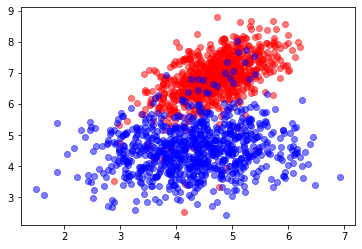

In [40]:
#PART D


#1
df2m_class0 = df2m[df2m['y']==0]
df2m_class1 = df2m[df2m['y']==1]

def scatting1(input1, input2, input3, input4):
    fig = plt.figure()
    plt.scatter(input1, input2, alpha = 0.5, color = 'red')
    plt.scatter(input3, input4, alpha = 0.5, color = 'blue')

scatting1(df2m_class0.x1, df2m_class0.x2, df2m_class1.x1, df2m_class1.x2,)


#2
cov_df2m_class0 = np.cov(df2m_class0.x1, df2m_class0.x2)
cov_df2m_class1 = np.cov(df2m_class1.x1, df2m_class1.x2)

mean_df2m_class0 = meanVector(df2m_class0)
mean_df2m_class1 = meanVector(df2m_class1)

DatasetArraytemp = [cov_df2m_class0, cov_df2m_class1, mean_df2m_class0, mean_df2m_class1, df2m]
print("Modified Dataset error 2: ", trainBayes(DatasetArraytemp, test2), "%")

#D3
# Normally outliers cause an increase in the error rate. 
# But in this case, we observe that the error rate decreases.
# For this example, we can see the points of Outliers spread towards the region where the opposite class is most concentrated on
# the graph, which may moved the line separating the two classes to a more accurate point and have reduced the error rate.

